# Twitter Bot Classifier Part 2

In this series of notebooks, we are using the [Fake Project](https://botometer.iuni.iu.edu/bot-repository/datasets.html) dataset to examine users habits and build a Twitter bot classifier. 
 
Previously, we looked into the potential threats that Twitter bot accounts pose. While some are harmless, others aim to manipulate and deceive viewers. We gathered several Twitter files from the Fake Project to assemble a Tweets and Users datasets. Null values have been dropped and tables have been formatted. Now, we will take a closer look into the features by conducting exploratory data analysis. 

## Tweets Table

In this notebook, we will focus on exploring the tweets table. 

In [89]:
# Numpy and pandas
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#NLP tools
import string
import re
import nltk
from nltk.corpus import stopwords
from googletrans import Translator

# NLP feature selection 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

# Sklearn data clean
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Logistic Regression
from sklearn.linear_model import Lasso, LogisticRegression

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
import graphviz

# Random Forests 
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Gradient Boost
from xgboost import XGBClassifier

# Evaluate
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score,accuracy_score


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Neural Network
from sklearn.neural_network import MLPClassifier

# Clustering 
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Math 
import math

# Datetime
from datetime import datetime
from dateutil import parser

# Import data
import warnings

In [2]:
tweets = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/cresci-2017.csv/datasets_full.csv/clean_tweets2')
users = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/cresci-2017.csv/datasets_full.csv/clean_users2')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283436 entries, 0 to 6283435
Data columns (total 18 columns):
id                       int64
text                     object
source                   object
user_id                  int64
in_reply_to_status_id    int64
in_reply_to_user_id      int64
retweeted_status_id      int64
retweet_count            int64
reply_count              int64
favorite_count           int64
num_hashtags             int64
num_urls                 int64
num_mentions             int64
created_at               object
timestamp                object
crawled_at               object
updated                  object
class                    int64
dtypes: int64(12), object(6)
memory usage: 862.9+ MB


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 24 columns):
id                                    7989 non-null int64
name                                  7989 non-null object
screen_name                           7989 non-null object
statuses_count                        7989 non-null int64
followers_count                       7989 non-null int64
friends_count                         7989 non-null int64
favourites_count                      7989 non-null int64
listed_count                          7989 non-null int64
lang                                  7989 non-null object
profile_image_url                     7989 non-null object
profile_use_background_image          7989 non-null int64
profile_background_image_url_https    7989 non-null object
profile_text_color                    7989 non-null object
profile_image_url_https               7989 non-null object
profile_sidebar_border_color          7989 non-null object
profile_sidebar

### Convert time variables to datetime 
It doesn't appear that time variables such as timestamp or created_at were saved as datetime. We will convert them to their respective data type. 

In [5]:
# Convert the time columns to np.datetime object
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

In [6]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [7]:
tweets['crawled_at'] = pd.to_datetime(tweets['crawled_at'])

In [8]:
tweets['updated'] = pd.to_datetime(tweets['updated'])

In [9]:
# Convert the created_at column to np.datetime object
users['timestamp'] = pd.to_datetime(users['timestamp'])

In [10]:
users['created_at'] = pd.to_datetime(users['created_at'])

In [11]:
users['crawled_at'] = pd.to_datetime(users['crawled_at'])

In [12]:
users['updated'] = pd.to_datetime(users['updated'])

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283436 entries, 0 to 6283435
Data columns (total 18 columns):
id                       int64
text                     object
source                   object
user_id                  int64
in_reply_to_status_id    int64
in_reply_to_user_id      int64
retweeted_status_id      int64
retweet_count            int64
reply_count              int64
favorite_count           int64
num_hashtags             int64
num_urls                 int64
num_mentions             int64
created_at               datetime64[ns, UTC]
timestamp                datetime64[ns]
crawled_at               datetime64[ns]
updated                  datetime64[ns]
class                    int64
dtypes: datetime64[ns, UTC](1), datetime64[ns](3), int64(12), object(2)
memory usage: 862.9+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 24 columns):
id                                    7989 non-null int64
name                                  7989 non-null object
screen_name                           7989 non-null object
statuses_count                        7989 non-null int64
followers_count                       7989 non-null int64
friends_count                         7989 non-null int64
favourites_count                      7989 non-null int64
listed_count                          7989 non-null int64
lang                                  7989 non-null object
profile_image_url                     7989 non-null object
profile_use_background_image          7989 non-null int64
profile_background_image_url_https    7989 non-null object
profile_text_color                    7989 non-null object
profile_image_url_https               7989 non-null object
profile_sidebar_border_color          7989 non-null object
profile_sidebar

In [15]:
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,class
0,515447020405137408,"""Il mare d'inverno è un concetto che il pensie...","<a href=""http://www.Matildadr89.com"" rel=""nofo...",237359828,0,0,0,0,0,0,0,0,0,2014-09-26 10:25:20+00:00,2014-09-26 12:25:20,2014-11-13 01:35:24,2014-11-13 01:35:24,1
1,513551196226093057,Read the History of Corona Beer http://t.co/Z...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",215693377,0,0,0,0,0,0,0,1,0,2014-09-21 04:52:01+00:00,2014-09-21 06:52:01,2014-11-12 23:35:05,2014-11-12 23:35:05,1
2,579534763872149504,After that it would of been up to the person i...,"<a href=""http://twitter.com/download/iphone"" r...",164284493,0,0,0,0,0,0,0,0,0,2015-03-22 06:47:09+00:00,2015-03-22 07:47:09,2015-05-01 13:21:46,2015-05-01 13:21:46,0
3,449751137970028544,RT @kcivey: @marionbarryjr I'm for public fina...,"<a href=""http://twitter.com/download/iphone"" r...",225683965,0,0,449735142085779456,1,0,0,0,0,2,2014-03-29 03:33:21+00:00,2014-03-29 04:33:21,2015-05-01 15:58:20,2015-05-01 15:58:20,0
4,589197488269045760,RT @specuIar: This hit me hard. http://t.co/rY...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",505440359,0,0,589196377353097216,1300,0,0,0,0,1,2015-04-17 22:43:22+00:00,2015-04-18 00:43:22,2015-05-01 13:21:33,2015-05-01 13:21:33,0


In [16]:
users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,profile_image_url,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,created_at,timestamp,crawled_at,updated,class
0,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,FFFFFF,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,2014-02-18 11:22:38+00:00,2014-02-18 12:22:38,2014-05-03 00:22:39,2016-03-15 15:20:24,1
1,343263643,RIP Teveon ,youpettihoe_,36513,2166,1627,2977,0,en,http://pbs.twimg.com/profile_images/5594447898...,...,FFFFFF,FFFFFF,http://pbs.twimg.com/profile_background_images...,FFFAFF,0A7A00,2011-07-27 09:01:04+00:00,2011-07-27 11:01:04,2015-05-01 23:18:23,2016-03-15 16:11:13,0
2,531154412,Bulah Lynne,Lynnevibe,10657,1194,996,1,8,en,http://pbs.twimg.com/profile_images/1914097815...,...,C0DEED,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,2012-03-20 11:48:05+00:00,2012-03-20 12:48:05,2014-05-05 23:24:32,2016-03-15 15:40:08,1
3,2377665366,Katherina Kistle,KatherinaKistle,37,0,38,0,0,en,http://pbs.twimg.com/profile_images/4430041788...,...,FFFFFF,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,2014-03-07 21:23:35+00:00,2014-03-07 22:23:35,2014-05-05 00:21:50,2016-03-15 15:16:15,1
4,3015346510,Lindsay Blessing Fan,lindsayspainfan,96,43,113,425,0,es,http://pbs.twimg.com/profile_images/5631073115...,...,000000,000000,http://pbs.twimg.com/profile_background_images...,000000,9266CC,2015-02-03 20:49:38+00:00,2015-02-03 21:49:38,2015-05-02 01:09:46,2016-03-15 16:07:16,0


# Exploratory Data Analysis
We'll start by exploring the Tweets table by keeping a few questions in mind.<br> 
__How many tweets were made by humans and robots?__ <br>
__Which accounts posted the most tweets?__ <br>

In [17]:
# Bot vs human tweets 
counts = tweets['class'].value_counts()
human = counts[0]
bot = counts[1]
human_per = (human/(human + bot))*100
bot_per = (bot/(human + bot))*100
print('There are {} tweets made by humans({:.3f}%) and {} tweets made by bots ({:.3f}%) in the tweets table.'.format(human, human_per, bot, bot_per))

There are 2826718 tweets made by humans(44.987%) and 3456718 tweets made by bots (55.013%) in the tweets table.


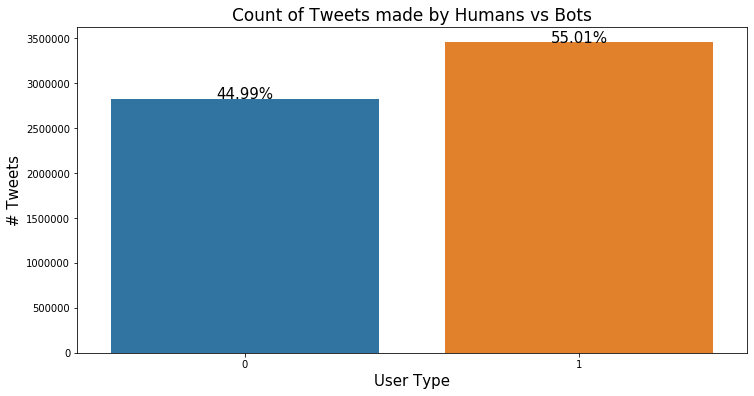

In [18]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'class', data = tweets)
g.set_title('Count of Tweets made by Humans vs Bots', fontsize = 17)
g.set_xlabel('User Type', fontsize = 15)
g.set_ylabel('# Tweets', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(tweets) * 100),
            ha="center", fontsize=15) 

As shown in the bar graph, the data consists of 45% tweets by humans and 55% tweets by robots. The ratio between human to robot tweets are close so we do not have an imbalance problem. 

#### Let's look at which accounts tweeted the most. 

In [19]:
# Number of unique user accounts
len(tweets['user_id'].unique().tolist())

5995

There are 5,996 unique user accounts in the Tweets table. 

In [20]:
# Create df for user class
bots = tweets.loc[tweets['class']==1]
gen = tweets.loc[tweets['class']==0]

In [21]:
# Counts of unique user accounts 
bots['user_id'].value_counts()

521370115     3258
334826952     3250
221141363     3250
239910996     3250
982414274     3250
              ... 
2382422750      66
2375328500      64
2382743514      63
2391867347      43
2384976224      38
Name: user_id, Length: 4912, dtype: int64

In [22]:
# Counts of unique user accounts 
gen['user_id'].value_counts()

15044720      3250
497404180     3249
182211050     3247
195076965     3247
14626600      3247
              ... 
492728332       24
2236789484      15
2200425967      14
24386710        13
514061230        3
Name: user_id, Length: 1083, dtype: int64

__Observation__: Based on the total count of tweets, the most frequent tweets from both genuine users and robot accounts share similar traits. The top five tweeters in each class has posted over three thousand tweets. 

## Correlation
We'll start by exmaining the correlation between features and target varaible. 

In [23]:
# Find correlations with the target and sort
corr = tweets.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 num_mentions            -0.473250
retweeted_status_id     -0.365936
in_reply_to_status_id   -0.309953
in_reply_to_user_id     -0.185500
num_hashtags            -0.143896
id                      -0.058521
retweet_count           -0.036961
favorite_count           0.016651
user_id                  0.061362
num_urls                 0.088025
class                    1.000000
reply_count                   NaN
Name: class, dtype: float64

Most Negative Correlations:
 num_mentions            -0.473250
retweeted_status_id     -0.365936
in_reply_to_status_id   -0.309953
in_reply_to_user_id     -0.185500
num_hashtags            -0.143896
id                      -0.058521
retweet_count           -0.036961
favorite_count           0.016651
user_id                  0.061362
num_urls                 0.088025
class                    1.000000
reply_count                   NaN
Name: class, dtype: float64


In [24]:
# Correlation 
top_feat = np.absolute(tweets.corr()['class']).sort_values(ascending=False)[:11]
top_feat

class                    1.000000
num_mentions             0.473250
retweeted_status_id      0.365936
in_reply_to_status_id    0.309953
in_reply_to_user_id      0.185500
num_hashtags             0.143896
num_urls                 0.088025
user_id                  0.061362
id                       0.058521
retweet_count            0.036961
favorite_count           0.016651
Name: class, dtype: float64

__Observation__: The correlation between our target variable and the top features are rather week. The strongest correlation to class is the num_mentions(-47%). This could possibly hint towards retweets and replying to other accounts to be a good indicator of whether a tweet was generated by a human or robot. 

In [25]:
# Top 10 features
print(top_feat.index)

Index(['class', 'num_mentions', 'retweeted_status_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'num_hashtags', 'num_urls', 'user_id', 'id',
       'retweet_count', 'favorite_count'],
      dtype='object')


In [ ]:
# Plot Pairplot
pp = tweets[top_feat.index]

sns.set(font_scale=1.7)
sns.pairplot(pp)
plt.show()

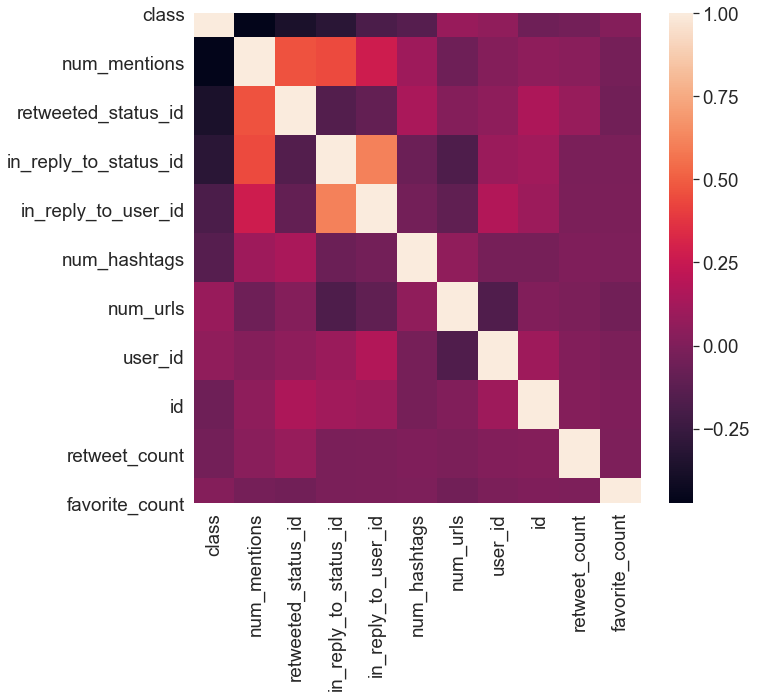

In [29]:
pp = tweets[top_feat.index]
plt.figure(figsize=(10,9))
corr = pp.corr()
sns.heatmap(corr)
plt.savefig('heatmat.png')

__Observation__: There doesn't appear to be high collinearity among the features. The correlation between in_reply_to_user_id and in_reply_to_status_id seems to be higher than 0.5. We'll probably drop these features during feature selection since they are not the main focus of tweet info.  

## Subsampling 

Due to hardware and memory limitations, we will reduce the size of the dataset and subsample 0.05% of tweets

In [30]:
sub_tweets = tweets.groupby('class').apply(pd.DataFrame.sample, frac=0.005).reset_index(drop=True)

In [31]:
sub_tweets.shape

(31418, 18)

# Feature Engineering and Selection

Since we have identified trends and relationship within the dataset, we will use our findings to select a set of features for our model. 

For this assignment, we will take the following steps for feature selection:
 * creating new variables by aggregation
 * dropping unwanted varaibles
 * encode for tweets

In [32]:
# Create new features 
tweets['hour'] = tweets['created_at'].apply(lambda x: x.hour)
tweets['month'] = tweets['created_at'].apply(lambda x: x.month)
tweets['day'] = tweets['created_at'].apply(lambda x: x.day)
tweets['year'] = tweets['created_at'].apply(lambda x: x.year)
tweets['length'] = tweets['text'].apply(len)
tweets['num_of_words'] = tweets['text'].str.split().apply(len)

In [33]:
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,...,timestamp,crawled_at,updated,class,hour,month,day,year,length,num_of_words
0,515447020405137408,"""Il mare d'inverno è un concetto che il pensie...","<a href=""http://www.Matildadr89.com"" rel=""nofo...",237359828,0,0,0,0,0,0,...,2014-09-26 12:25:20,2014-11-13 01:35:24,2014-11-13 01:35:24,1,10,9,26,2014,133,23
1,513551196226093057,Read the History of Corona Beer http://t.co/Z...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",215693377,0,0,0,0,0,0,...,2014-09-21 06:52:01,2014-11-12 23:35:05,2014-11-12 23:35:05,1,4,9,21,2014,55,7
2,579534763872149504,After that it would of been up to the person i...,"<a href=""http://twitter.com/download/iphone"" r...",164284493,0,0,0,0,0,0,...,2015-03-22 07:47:09,2015-05-01 13:21:46,2015-05-01 13:21:46,0,6,3,22,2015,113,23
3,449751137970028544,RT @kcivey: @marionbarryjr I'm for public fina...,"<a href=""http://twitter.com/download/iphone"" r...",225683965,0,0,449735142085779456,1,0,0,...,2014-03-29 04:33:21,2015-05-01 15:58:20,2015-05-01 15:58:20,0,3,3,29,2014,140,26
4,589197488269045760,RT @specuIar: This hit me hard. http://t.co/rY...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",505440359,0,0,589196377353097216,1300,0,0,...,2015-04-18 00:43:22,2015-05-01 13:21:33,2015-05-01 13:21:33,0,22,4,17,2015,54,7


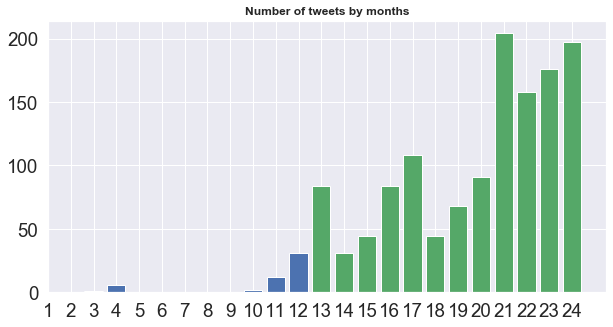

In [36]:
# Number of tweets by months - creating a plot

tweets['month_year'] = tweets['created_at'].apply(lambda x: str(x.year)+'-'+str(x.month)+'-1')
tweets['month_year'].unique()[0]
tweets['month_year'] = pd.to_datetime(tweets['month_year'])

tweets[['created_at', 'month_year']].head()

yr_monthly_tweets2 = tweets.groupby(['month','year']).size().unstack()


plt.figure(figsize=(10,5))

plt.title('Number of tweets by months', fontsize=12, fontweight='bold')
plt.bar(yr_monthly_tweets2.index, yr_monthly_tweets2.values[:,0])
plt.bar(yr_monthly_tweets2.index+12, yr_monthly_tweets2.values[:,1], color='g')
plt.xticks(list(yr_monthly_tweets2.index)+list(yr_monthly_tweets2.index+12))
plt.show() 

In [37]:
tweets['month_year'].describe()

count                 6283436
unique                     94
top       2014-10-01 00:00:00
freq                  1319401
first     2007-03-01 00:00:00
last      2015-05-01 00:00:00
Name: month_year, dtype: object

In [38]:
tweets['year'].describe()

count    6.283436e+06
mean     2.014087e+03
std      7.075126e-01
min      2.007000e+03
25%      2.014000e+03
50%      2.014000e+03
75%      2.014000e+03
max      2.015000e+03
Name: year, dtype: float64

__Observation__: This dataset contains tweets posted from 2007 to 2015. Majority of the tweets were collected during 2014 and 2015. 

## Clean and Transform Tweets

Before we can have a model process information from the tweets, we must convert text to numeric values that machines can understand. 

We will clean the tweets with the following steps:
1. Remove hyperlinks, mentions, and 'RT' from retweets
2. Word Counts with __CountVectorizer__: Convert a collection of text documents to a matrix of token counts
     - Tokenization: Converting a sentence into a list of words
     - Remove stopwords: Terms that were ignored because they either
         - occurred in too many documents (max_df)
         - occurred in too few documents (min_df)
         - were cut off by feature selection (max_features).
     - Lammentization/stemming: Converting any form of a word to its root word
     - Returns vectors of the counts of each word
3. Word Frequencies with __TfidfTransform__: Transform a count matrix to a normalized tf representation
     - Term Frequency: This summarizes how often a given word appears within a document
     - Inverse Document Frequency: This downscales words that appear a lot across documents <br>
      idf(d, t) = log [ (1 + n) / (1 + df(d, t)) ] + 1.

Reference:
[clean tweet](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)
 
First, we will paritation the clean_tweets into separate classes for building bag of words and cut down on processing time for CountVectorizer and TfidTransformer. 
 
Let's start by cleaning the bot tweets. 

NOTE: Unable to Translate Italian tweets to English [Source](https://pypi.org/project/googletrans/)

In [41]:
sub_tweets['text'] = sub_tweets['text'].astype('str')

In [42]:
# Create df for user class
bots = sub_tweets.loc[sub_tweets['class']==1]
gen = sub_tweets.loc[sub_tweets['class']==0]

In [43]:
# Create new df 
b_tweets = pd.DataFrame(bots['text'])
b_tweets.head()

,text
14134,Read the History of the Grateful Dead http://...
14135,The Beautiful Canadian Rockies Tour http://t....
14136,"Perd�n, es que volv� a ver 'Pulp Fiction' por ..."
14137,"*In farmacia* -Scusate, avete qualcosa contro..."
14138,"""Ed è brutto quando trattieni le lacrime e ing..."


In [44]:
# Create new df  
g_tweets = pd.DataFrame(gen['text'])
g_tweets.head()

,text
0,FOUNDER OF GREENPEACE: Why I am a Climate Chan...
1,RT @AoifeAssumpta: I'm suggesting we let kids ...
2,RT @IanBoothby: Mark Hammil was such a perfect...
3,RT @IndpndtLiv: Hello new followers :) head ov...
4,@SMARTCares Please check my reply. Thanks!


Let's clean the tweets to remove links, @, and RT.

In [45]:
def text_cleaner(text):
    text = re.sub(r'http.*','',text)
    text = re.sub("@[A-Za-z0-9]+",'',text)
    text = re.sub(r'bit/ly.*', '', text)
    text = re.sub(r'b\'', '', text)
    text = re.sub(r'b"', '', text)
    text = text.replace('RT', '')
    return text

b_tweets['clean_tweets'] = b_tweets['text'].apply(lambda x: text_cleaner(x))

b_tweets.head()

,text,clean_tweets
14134,Read the History of the Grateful Dead http://...,Read the History of the Grateful Dead
14135,The Beautiful Canadian Rockies Tour http://t....,The Beautiful Canadian Rockies Tour
14136,"Perd�n, es que volv� a ver 'Pulp Fiction' por ...","Perd�n, es que volv� a ver 'Pulp Fiction' por ..."
14137,"*In farmacia* -Scusate, avete qualcosa contro...","*In farmacia* -Scusate, avete qualcosa contro..."
14138,"""Ed è brutto quando trattieni le lacrime e ing...","""Ed è brutto quando trattieni le lacrime e ing..."


In [46]:
g_tweets['clean_tweets'] = g_tweets['text'].apply(lambda x: text_cleaner(x))

g_tweets.head()

,text,clean_tweets
0,FOUNDER OF GREENPEACE: Why I am a Climate Chan...,FOUNDER OF GREENPEACE: Why I am a Climate Chan...
1,RT @AoifeAssumpta: I'm suggesting we let kids ...,: I'm suggesting we let kids be gender non co...
2,RT @IanBoothby: Mark Hammil was such a perfect...,: Mark Hammil was such a perfect Joker he eve...
3,RT @IndpndtLiv: Hello new followers :) head ov...,: Hello new followers :) head over to
4,@SMARTCares Please check my reply. Thanks!,Please check my reply. Thanks!


In [47]:
# Return only characters 
def clean_alpha(text):
    text = " ".join(re.split("[^a-zA-Z]*", text))
    return text

b_tweets['clean_tweets'] = b_tweets['clean_tweets'].apply(lambda x: clean_alpha(x.lower()))

b_tweets.head()

/Users/tsawaengsri/anaconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


,text,clean_tweets
14134,Read the History of the Grateful Dead http://...,read the history of the grateful dead
14135,The Beautiful Canadian Rockies Tour http://t....,the beautiful canadian rockies tour
14136,"Perd�n, es que volv� a ver 'Pulp Fiction' por ...",perd n es que volv a ver pulp fiction por vez
14137,"*In farmacia* -Scusate, avete qualcosa contro...",in farmacia scusate avete qualcosa contro la ...
14138,"""Ed è brutto quando trattieni le lacrime e ing...",ed brutto quando trattieni le lacrime e ingoi...


In [48]:
g_tweets['clean_tweets'] = g_tweets['clean_tweets'].apply(lambda x: clean_alpha(x.lower()))

g_tweets.head()

,text,clean_tweets
0,FOUNDER OF GREENPEACE: Why I am a Climate Chan...,founder of greenpeace why i am a climate chang...
1,RT @AoifeAssumpta: I'm suggesting we let kids ...,i m suggesting we let kids be gender non conf...
2,RT @IanBoothby: Mark Hammil was such a perfect...,mark hammil was such a perfect joker he even ...
3,RT @IndpndtLiv: Hello new followers :) head ov...,hello new followers head over to
4,@SMARTCares Please check my reply. Thanks!,please check my reply thanks


Since we were unable to translate non English tweets, those cells are empty and will be dropped.

In [49]:
# Add clean_tweets back to bots and gen df to drop empty tweets
bots['clean_tweets'] = b_tweets['clean_tweets']
gen['clean_tweets'] = g_tweets['clean_tweets']

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# Shape before dropping empty tweets
print(bots.shape)
print(gen.shape)

(17284, 19)
(14134, 19)


In [51]:
# Replace field that's entirely space (or empty) with NaN
bots = bots.replace(r'^\s*$', np.nan, regex=True)
gen = gen.replace(r'^\s*$', np.nan, regex=True)

In [52]:
# Drop nan
bots = bots.dropna() 
gen = gen.dropna()

In [53]:
# Reset index to start at 0
bots = bots.reset_index()
gen = gen.reset_index()

In [54]:
# Shape after dropping empty tweets
print(bots.shape)
print(gen.shape)

(16984, 20)
(13528, 20)


We lost a few hundreds of tweets for bots and genuine accounts. 

In [55]:
# Convert df to np arrary 
b_clean = bots['clean_tweets'].values
g_clean = gen['clean_tweets'].values

In [56]:
# Convert np arrary to one deminsional array 
b_clean = b_clean.ravel()

In [57]:
type(b_clean)

numpy.ndarray

In [58]:
# Convert np arrary to one deminsional array 
g_clean = g_clean.ravel()

In [59]:
type(g_clean)

numpy.ndarray

### Text Processing - Count Vectorizer
Converting a collection of stemmed tweets to a matrix of token counts

In [60]:
# Initialize a CountVectorizer object for bot tweets
b_count_vectorizer = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix for bot tweets
b_clean = b_count_vectorizer.fit_transform(b_clean) 

# Summarize encoded vector
print(b_clean.shape)
print(type(b_clean))

(16984, 21671)
<class 'scipy.sparse.csr.csr_matrix'>


In [61]:
# Bot Tweets Vocabulary 
b_vocab = b_count_vectorizer.get_feature_names()
np.array(b_vocab[:30])

array(['aaa', 'aaaa', 'aaaah', 'aaaahhhhhindovina', 'aaall', 'aaron',
       'ab', 'abate', 'abba', 'abbaia', 'abbamo', 'abbandona',
       'abbandonano', 'abbandonare', 'abbandonata', 'abbandonato',
       'abbandoneranno', 'abbandono', 'abbassano', 'abbassare',
       'abbassata', 'abbassate', 'abbasser', 'abbassi', 'abbastanza',
       'abbatte', 'abbatterli', 'abbattuto', 'abbi', 'abbia'],
      dtype='<U17')

In [62]:
# Initialize a CountVectorizer object for bot tweets
g_count_vectorizer = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix for genuine tweets
g_clean = g_count_vectorizer.fit_transform(g_clean)

# Summarize encoded vector
print(g_clean.shape)
print(type(g_clean))

(13528, 21539)
<class 'scipy.sparse.csr.csr_matrix'>


In [63]:
# Genuine Tweets Vocabulary 
g_vocab = g_count_vectorizer.get_feature_names()
np.array(g_vocab[:30])

array(['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaah',
       'aaaaaaaarrrrggggghhhhhhgg', 'aaaaah', 'aaahh', 'aaarrgghh',
       'aaaw', 'aah', 'aajtak', 'aaliyahmovie', 'aaliyahprincessofrnb',
       'aalways', 'aamidor', 'aamx', 'aan', 'aana', 'aap', 'aapbreakup',
       'aapsweep', 'aaptards', 'aapwaveinharyana', 'aaral', 'aarhus',
       'aaron', 'aarons', 'aarontaylorjohnson', 'aarp'], dtype='<U25')

### Text Processing - Count Vectorizer
Tf-idf stands for term frequencey-inverse document frequency. It's a numerical statistic intended to reflect

How important a word is to a document or a corpus (i.e a collection of documents)

 * number of rows is the total number of documents (list of stemmed tweets)
 * number of columns is the total number of unique terms (tokens) across the documents

In [64]:
# Learn the idf vector (global term weights) for bot tweets
b_tf_transformer = TfidfTransformer(use_idf=False).fit(b_clean) # Don't enable inverse-document-frequency reweighting

# Transform a count matrix to a tf-idf representation
b_tfidf_train = b_tf_transformer.transform(b_clean)

# Summarize encoded vector
print(b_tfidf_train.shape)
print(type(b_tfidf_train))

(16984, 21671)
<class 'scipy.sparse.csr.csr_matrix'>


In [66]:
# Learn the idf vector (global term weights) for genuine tweets
g_tf_transformer = TfidfTransformer(use_idf=False).fit(g_clean)

# Transform a count matrix to a tf-idf representation
g_tfidf_train = g_tf_transformer.transform(g_clean)

# Summarize encoded vector
print(g_tfidf_train.shape)
print(type(g_tfidf_train))

(13528, 21539)
<class 'scipy.sparse.csr.csr_matrix'>


As shown above, there are over 20,000 tokens for both bots and genuine tweets. We'll need to reduce the number of features to prevent overfitting. 

__TruncatedSVD__: performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

In [67]:
# TruncatedSVD to reduce dimensions 
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42).fit(b_tfidf_train)
b_svdTFit = svd.fit_transform(b_tfidf_train)

# Summary of transformation 
print(b_svdTFit.shape)
print(svd.explained_variance_)
print(svd.explained_variance_ratio_.sum())

(16984, 100)
[0.02040028 0.0142412  0.01165332 0.01160139 0.01072895 0.0098706
 0.00934407 0.00686314 0.00620361 0.00521936 0.0049949  0.00486477
 0.00446575 0.00378333 0.00427008 0.00419162 0.00398234 0.0034497
 0.00364174 0.00353455 0.00351685 0.00339071 0.00324804 0.00299064
 0.00276114 0.00276602 0.00273297 0.00267171 0.00260114 0.00256045
 0.00255934 0.00250793 0.00248267 0.00245147 0.00239846 0.002381
 0.00230764 0.00230554 0.00223899 0.00220629 0.00216316 0.00215187
 0.00206043 0.00203191 0.00200961 0.00196279 0.00194509 0.00191754
 0.00191105 0.00188806 0.00185091 0.00182061 0.00181084 0.0017952
 0.00174436 0.00173746 0.0017258  0.00171417 0.00171998 0.00166496
 0.00160299 0.00159545 0.00157518 0.00156661 0.00156365 0.00155168
 0.00152315 0.00152062 0.00151893 0.00149782 0.00148038 0.00145565
 0.00143727 0.00143099 0.00140366 0.0013817  0.00136812 0.00135592
 0.00133653 0.00132996 0.00132215 0.00131243 0.00129391 0.00128499
 0.00126938 0.00126199 0.00124694 0.00124349 0.0012277

In [68]:
# TruncatedSVD to reduce dimensions 
svd2 = TruncatedSVD(n_components=100, n_iter=7, random_state=42).fit(g_tfidf_train)
g_svdTFit = svd2.fit_transform(g_tfidf_train)

# Summary of transformation 
print(g_svdTFit.shape)
print(svd2.explained_variance_)
print(svd2.explained_variance_ratio_.sum())

(13528, 100)
[0.00684255 0.00657664 0.00654711 0.0048162  0.0047718  0.00452977
 0.00446184 0.00384323 0.00383053 0.00360923 0.00350039 0.00332277
 0.00332728 0.00329741 0.00313938 0.00312349 0.00298444 0.00284689
 0.00274684 0.00266633 0.00257327 0.00252809 0.00251427 0.00247414
 0.00236383 0.00230705 0.00229177 0.00216841 0.00222465 0.00217651
 0.00212583 0.00209962 0.00208895 0.00207953 0.00199647 0.00200356
 0.0019945  0.00197131 0.00193405 0.00191486 0.00190336 0.00186163
 0.00177818 0.00175932 0.00170666 0.0016733  0.00164973 0.0016513
 0.0016239  0.00162005 0.00160114 0.00159238 0.0015779  0.00156127
 0.00154652 0.00151255 0.00150639 0.00149244 0.00148574 0.00147275
 0.00143982 0.00142757 0.00142473 0.00141449 0.00141076 0.00140502
 0.00138348 0.00138274 0.00135878 0.00134658 0.00133094 0.00132371
 0.00131672 0.00130058 0.00128223 0.00127724 0.00126355 0.00124642
 0.00124245 0.00123619 0.00122077 0.0012161  0.00120944 0.00120426
 0.00119002 0.00118755 0.00117707 0.00115798 0.001

In [69]:
# Convert svdTFit array to df 
b_svdTFit = pd.DataFrame(b_svdTFit)
b_svdTFit.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001363,0.688667,-0.106836,0.000904,-0.008504,-0.000453,0.001552,-0.048662,0.000670,-0.000388,...,0.003377,-0.001839,-0.006964,-0.011957,0.015086,0.010792,0.002605,-0.007524,-0.006270,0.013281
1,0.000021,0.000530,0.002002,-0.000009,-0.000025,-0.000014,0.000017,0.004824,0.000130,0.000145,...,-0.000470,-0.011162,0.006198,-0.006974,0.007134,0.000839,-0.000323,-0.019351,0.017661,0.000584
2,0.000539,0.002338,0.000587,-0.000200,0.001742,0.000285,-0.000498,0.014874,0.001444,0.001474,...,-0.002106,-0.006429,0.011533,-0.002894,0.003305,-0.001891,0.004013,0.001608,0.004493,-0.012774
3,0.264711,0.002008,0.000054,-0.090371,0.175856,0.253964,-0.022879,0.000123,-0.035397,-0.034507,...,-0.012418,0.004621,0.003917,-0.003597,0.009108,0.001498,-0.010051,-0.000648,0.000602,-0.003168
4,0.338437,-0.002246,-0.000563,-0.108007,-0.035243,-0.237808,0.310905,0.000171,0.150630,0.004934,...,-0.003134,0.001655,0.024093,0.123340,0.057648,-0.013041,0.088994,-0.017661,-0.075975,0.050357


In [70]:
print(b_svdTFit.shape)

(16984, 100)


In [71]:
bots.shape

(16984, 20)

In [72]:
# Convert svdTFit array to df 
g_svdTFit = pd.DataFrame(g_svdTFit)
g_svdTFit.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.003605,0.000973,-0.000389,0.004634,0.000142,-0.000683,0.002752,0.002042,-0.001996,-0.000102,...,0.006245,-0.002045,-0.001633,0.002762,-0.003999,-0.010669,-0.014653,0.004595,-0.010447,0.003188
1,0.021459,0.006643,0.002160,0.020741,0.003011,-0.001295,0.000808,0.010286,-0.005963,0.002217,...,0.013992,-0.017772,-0.004762,-0.003577,-0.009730,-0.053410,-0.049526,0.048174,0.007276,-0.002327
2,0.015582,0.002947,0.002915,0.015762,-0.007923,-0.003226,0.003166,0.013545,-0.011569,0.003354,...,-0.003958,-0.001476,0.008048,0.003580,-0.002689,0.000271,-0.005497,-0.003891,-0.001359,0.018065
3,0.031096,0.017736,0.001949,0.056130,-0.048824,-0.024200,0.007376,0.070650,-0.075369,-0.310837,...,0.006553,-0.013940,-0.011231,-0.022997,-0.005559,0.026463,0.004866,-0.007484,0.011045,-0.006396
4,0.025442,0.027406,0.005710,0.018547,-0.029354,0.001985,-0.003487,0.417971,0.390137,0.004043,...,0.000841,-0.033147,0.003461,0.014964,-0.005773,0.002218,0.021047,-0.004825,-0.001003,-0.018822


In [73]:
g_svdTFit.shape

(13528, 100)

In [74]:
gen.shape

(13528, 20)

In [75]:
# Place the DataFrames side by side
bots_tfid = pd.concat([bots, b_svdTFit], axis=1)
bots_tfid.head()

,index,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,...,90,91,92,93,94,95,96,97,98,99
0,14134,526486908629942273,Read the History of the Grateful Dead http://...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",520806944,0,0,0,0,0,...,0.003377,-0.001839,-0.006964,-0.011957,0.015086,0.010792,0.002605,-0.007524,-0.006270,0.013281
1,14135,528698964171034624,The Beautiful Canadian Rockies Tour http://t....,"<a href=""http://tweetadder.com"" rel=""nofollow""...",327747371,0,0,0,0,0,...,-0.000470,-0.011162,0.006198,-0.006974,0.007134,0.000839,-0.000323,-0.019351,0.017661,0.000584
2,14136,461334106509295617,"Perd�n, es que volv� a ver 'Pulp Fiction' por ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2357267365,0,0,0,0,0,...,-0.002106,-0.006429,0.011533,-0.002894,0.003305,-0.001891,0.004013,0.001608,0.004493,-0.012774
3,14137,483962281353805825,"*In farmacia* -Scusate, avete qualcosa contro...","<a href=""http://www.giselecaldoro.it"" rel=""nof...",466257207,0,0,0,0,0,...,-0.012418,0.004621,0.003917,-0.003597,0.009108,0.001498,-0.010051,-0.000648,0.000602,-0.003168
4,14138,468005231759224832,"""Ed è brutto quando trattieni le lacrime e ing...","<a href=""http://www.politicoverde.com"" rel=""no...",467100704,0,0,0,0,0,...,-0.003134,0.001655,0.024093,0.123340,0.057648,-0.013041,0.088994,-0.017661,-0.075975,0.050357


In [76]:
bots_tfid.shape

(16984, 120)

In [77]:
# Join Tfid with class df 
gen_tfid = pd.concat([gen, g_svdTFit], axis =1)
gen_tfid.head()

,index,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,...,90,91,92,93,94,95,96,97,98,99
0,0,579482970861375489,FOUNDER OF GREENPEACE: Why I am a Climate Chan...,"<a href=""http://www.apple.com"" rel=""nofollow"">...",24255637,0,0,0,0,0,...,0.006245,-0.002045,-0.001633,0.002762,-0.003999,-0.010669,-0.014653,0.004595,-0.010447,0.003188
1,1,593140847589240833,RT @AoifeAssumpta: I'm suggesting we let kids ...,"<a href=""http://twitter.com/download/iphone"" r...",1969254588,0,0,593115571387924480,5,0,...,0.013992,-0.017772,-0.004762,-0.003577,-0.009730,-0.053410,-0.049526,0.048174,0.007276,-0.002327
2,2,592058443525136384,RT @IanBoothby: Mark Hammil was such a perfect...,"<a href=""https://about.twitter.com/products/tw...",16484437,0,0,592057825876029440,1454,0,...,-0.003958,-0.001476,0.008048,0.003580,-0.002689,0.000271,-0.005497,-0.003891,-0.001359,0.018065
3,3,319531218272133121,RT @IndpndtLiv: Hello new followers :) head ov...,"<a href=""http://twitter.com/download/iphone"" r...",27679500,0,0,319530096669118464,1,0,...,0.006553,-0.013940,-0.011231,-0.022997,-0.005559,0.026463,0.004866,-0.007484,0.011045,-0.006396
4,4,433506706954276864,@SMARTCares Please check my reply. Thanks!,"<a href=""http://ubersocial.com"" rel=""nofollow""...",26970502,433494227704504320,74409069,0,0,0,...,0.000841,-0.033147,0.003461,0.014964,-0.005773,0.002218,0.021047,-0.004825,-0.001003,-0.018822


In [78]:
gen_tfid.shape

(13528, 120)

In [79]:
# Concatenate bots_tfid and gen_tfid to create df for modeling 
df_tweets = pd.concat([bots_tfid, gen_tfid], ignore_index=True)

df_tweets.head()

,index,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,...,90,91,92,93,94,95,96,97,98,99
0,14134,526486908629942273,Read the History of the Grateful Dead http://...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",520806944,0,0,0,0,0,...,0.003377,-0.001839,-0.006964,-0.011957,0.015086,0.010792,0.002605,-0.007524,-0.006270,0.013281
1,14135,528698964171034624,The Beautiful Canadian Rockies Tour http://t....,"<a href=""http://tweetadder.com"" rel=""nofollow""...",327747371,0,0,0,0,0,...,-0.000470,-0.011162,0.006198,-0.006974,0.007134,0.000839,-0.000323,-0.019351,0.017661,0.000584
2,14136,461334106509295617,"Perd�n, es que volv� a ver 'Pulp Fiction' por ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2357267365,0,0,0,0,0,...,-0.002106,-0.006429,0.011533,-0.002894,0.003305,-0.001891,0.004013,0.001608,0.004493,-0.012774
3,14137,483962281353805825,"*In farmacia* -Scusate, avete qualcosa contro...","<a href=""http://www.giselecaldoro.it"" rel=""nof...",466257207,0,0,0,0,0,...,-0.012418,0.004621,0.003917,-0.003597,0.009108,0.001498,-0.010051,-0.000648,0.000602,-0.003168
4,14138,468005231759224832,"""Ed è brutto quando trattieni le lacrime e ing...","<a href=""http://www.politicoverde.com"" rel=""no...",467100704,0,0,0,0,0,...,-0.003134,0.001655,0.024093,0.123340,0.057648,-0.013041,0.088994,-0.017661,-0.075975,0.050357


In [80]:
# Drop unwanted columns 
df_tweets = df_tweets.drop(columns=['index','id','text','source','user_id','created_at', 'timestamp', 'crawled_at', 'updated','clean_tweets'])

In [81]:
df_tweets.columns

Index(['in_reply_to_status_id',   'in_reply_to_user_id',
         'retweeted_status_id',         'retweet_count',
                 'reply_count',        'favorite_count',
                'num_hashtags',              'num_urls',
                'num_mentions',                 'class',
       ...
                            90,                      91,
                            92,                      93,
                            94,                      95,
                            96,                      97,
                            98,                      99],
      dtype='object', length=110)

In [82]:
df_tweets.shape

(30512, 110)

In [83]:
# Check for null values 
df_tweets.isnull().sum().sum()

0

# Evaluating and Comparing Machine Learning Models
In this section we will build, train, and evalute several machine learning methods for our supervised regression task.

## Split Train and Test set¶
Let's split dataset by using function train_test_split(). Here, the Dataset is broken into two parts in a ratio of 70:30. It means 70% data will be used for model training and 30% for model testing.

To continue feature selection, we will start by using the original attributes in the raw training set.

In [84]:
# Set variables 
y = df_tweets['class']
X = df_tweets.drop(columns=['class'])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Metric 
We will evaluate our models based on their predicted probability __ROC AUC score__. ROC AUC "summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds"[Brownlee](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

We’ll also focus on the __false positive rate__(FPR) and __false negative rate__(FNR). False positive rate is identifying genuine tweets as robot tweets. This could lead to disregarding value customer behavior information which can provide misleading data for future marketing campaigns and lower customer satisfaction. False negative rate is failure to label true robot tweets as bots tweets, which results in obtaining false customer information. 

FPR and FNR are reflected in the following metrics: 

 * __Accuracy__: ratio of properly labeled accounts 

 * __Precision__: ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all tweets that are labeled as bots, how many are actually bots? High precision relates to the low false positive rate. 

 * __Recall (Sensitivity)__: ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the tweets that were genereated by bots, how many did we label? 

 
# Model  Selection

We will compare three different machine learning models:

1. Logistic Regression
2. Random Forest Classifer
3. Neural Network Classifer 

We will fit these models the appropiate training set.

## Baseline 
For a naive baseline, we will use logistic regression to predict the probability of an user account being a robot. Unlike linear regression which gives continuous output, logistic regression provides a constant output in predicting binary classes. If the probability 'p' is greater than 0.5, the data is labeled '1'. Probability less than 0.5 is labeled as '0'.

## Logistic Regression 
First, we'll create the model and train the model and make predictions on the testing data.

# Modeling

In [86]:
# Function to plot ROC curve 
def roc_curve(model, X_train, y_train, X_test, y_test):
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    y_pred_proba2 = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_proba)
    fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_proba2)

    model_auc = metrics.roc_auc_score(y_train, y_pred_proba)
    model_auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label="Train, auc="+str(model_auc))
    ax.plot(fpr2, tpr2, label="Test, auc="+str(model_auc2))

    plt.title('ROC curve')
    ax.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()

In [87]:
# Logistic Regression Model 
lr = LogisticRegression()

# Fit and predict 
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

# CV to check if overfitting 
print(cross_val_score(lr, X_train, y_train, cv=5))

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

[0.71652622 0.73244382 0.72823034 0.71301498 0.70819672]


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
# Calculate metrics
lr_roc_auc = roc_auc_score(y_test, lr_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (lr_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (lr_accuracy * 100.0))
print('Recall: %.2f%%' % (lr_recall * 100.0))
print('Precision: %.2f%%' % (lr_precision * 100.0))
print(confusion_matrix(y_test, lr_y_pred))

ROC_AUC: 69.96%
Accuracy: 71.15%
Recall: 80.45%
Precision: 71.36%
[[2414 1645]
 [ 996 4099]]


In [ ]:
# Logistic Model
#parameters = {'C':np.logspace(-5,5)}
#lr = LogisticRegression()
#gsc_lr = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
#gsc_lr.fit(X_train, y_train)
#print(gsc_lr.best_params_, gsc_lr.best_score_)

# {'C': 1e-05} 0.771215887401393

In [ ]:
# Optmizied Logistic Model
#parameters = {}
#parameters['penalty'] = ['l1', 'l2']
#gsc_lr2 = LogisticRegression(C=1e-05)
#gsc_lr2 = GridSearchCV(gsc_lr2, parameters, cv=5, scoring='roc_auc')
#gsc_lr2.fit(X_train, y_train)
#print(gsc_lr2.best_params_, gsc_lr2.best_score_)

# NOTE: Took too long to process 

### Optimized Logistic Regression Model 

In [91]:
# Optimized Logistic Regression Model 
gsc_lr = LogisticRegression(C=1e-05)
gsc_lr.fit(X_train, y_train)
gsc_lr_y_pred = gsc_lr.predict(X_test)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
# Calculate metrics
gsc_lr_roc_auc = roc_auc_score(y_test, gsc_lr_y_pred)
gsc_lr_accuracy = accuracy_score(y_test, gsc_lr_y_pred)
gsc_lr_recall = recall_score(y_test, gsc_lr_y_pred)
gsc_lr_precision = precision_score(y_test, gsc_lr_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (gsc_lr_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (gsc_lr_accuracy * 100.0))
print('Recall: %.2f%%' % (gsc_lr_recall * 100.0))
print('Precision: %.2f%%' % (gsc_lr_precision * 100.0))
print(confusion_matrix(y_test, gsc_lr_y_pred))

ROC_AUC: 69.96%
Accuracy: 71.15%
Recall: 80.45%
Precision: 71.36%
[[2414 1645]
 [ 996 4099]]


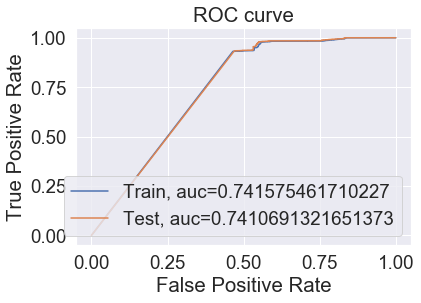

In [93]:
# Function to plot ROC curve 
roc_curve(gsc_lr, X_train, y_train, X_test, y_test)

__Evaluation__: From cross validation, this model doesn't seem to be overfitting by much since the accuracry scores range between 0.70 to 0.73. With a recall of 80.45% and precision of 71.36%, this model was better at classifying robot tweets than geninue ones from human users. 

### Random Forest 

In [94]:
# Random Forest Model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and predict
rf.fit(X_train, y_train) 
rf_y_pred = rf.predict(X_test)

# Check if model is overfitting 
print(cross_val_score(rf, X_train, y_train, cv=5))

# Results: [0.98972443 0.98949089 0.9901915  0.9927587  0.99299065]

[0.99438202 0.99297753 0.99227528 0.99391386 0.99391101]


In [95]:
# Calculate metrics
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (rf_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print('Recall: %.2f%%' % (rf_recall * 100.0))
print('Precision: %.2f%%' % (rf_precision * 100.0))
print(confusion_matrix(y_test, rf_y_pred))

#ROC_AUC: 99.20%
#Accuracy: 99.12%
#Recall: 98.43044928389249 %
#Precision: 99.98007174172977 %
#[[4077    1]
 #[  80 5017]]


ROC_AUC: 99.60%
Accuracy: 99.55%
Recall: 99.21%
Precision: 99.98%
[[4058    1]
 [  40 5055]]


In [ ]:
#Optimizing Random Forest
#parameters = {}
#parameters['criterion'] = ['entropy','gini']
#parameters['n_estimators'] = [100,200,300]

#gsc_rf = GridSearchCV(rf, parameters, cv=5, verbose=1, scoring='roc_auc')
#gsc_rf.fit(X_train, y_train)
#print(gsc_rf.best_params_, gsc_rf.best_score_)

# {'criterion': 'entropy', 'n_estimators': 300} 0.9993297513905806

### Optmized Random Forest

In [96]:
# Optimized Random Forest
gsc_rf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42)
gsc_rf.fit(X_train, y_train) 
gsc_rf_y_pred = gsc_rf.predict(X_test)

In [97]:
# Calculate metrics
gsc_rf_roc_auc = roc_auc_score(y_test, gsc_rf_y_pred)
gsc_rf_accuracy = accuracy_score(y_test, gsc_rf_y_pred)
gsc_rf_recall = recall_score(y_test, gsc_rf_y_pred)
gsc_rf_precision = precision_score(y_test, gsc_rf_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (gsc_rf_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (gsc_rf_accuracy * 100.0))
print('Recall: %.2f%%' % (gsc_rf_recall * 100.0))
print('Precision: %.2f%%' % (gsc_rf_precision * 100.0))
print(confusion_matrix(y_test, gsc_rf_y_pred))

#ROC_AUC: 99.23%
#Accuracy: 99.15%
#Recall: 98.50892681969786 %
#Precision: 99.96018315747561 %
#[[4076    2]
 #[  76 5021]]

ROC_AUC: 99.61%
Accuracy: 99.57%
Recall: 99.25%
Precision: 99.98%
[[4058    1]
 [  38 5057]]


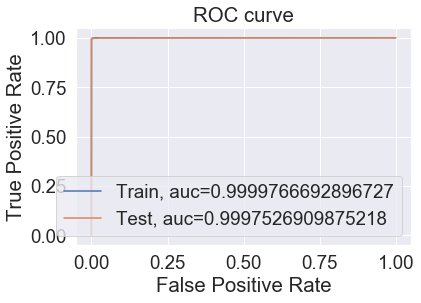

In [98]:
# Function to plot ROC curve 
roc_curve(gsc_rf, X_train, y_train, X_test, y_test)

__Evaluation__: The optimized random forest model drastically outperforms the logistic regression model. Based on the training data's cross validation score, the model is relatively stable by yielding accuracy score of 99%. On the test data, this model yield 99% for both recall and precision.  

### Model Interpretation: Feature Importances
For model interpretability, we will take a look at the feature importances of our optimized random forest. We may use these feature importances as a method of dimensionality reduction in future work.

In [99]:
# Top N importances
N = 10
importances = gsc_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in gsc_rf.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X.columns, 'Importance': importances})

top_N = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N

,Variable,Importance
12,3,0.094558
9,0,0.080692
8,num_mentions,0.064746
28,19,0.063557
10,1,0.046394
11,2,0.044406
22,13,0.043821
16,7,0.041626
17,8,0.037597
23,14,0.028264


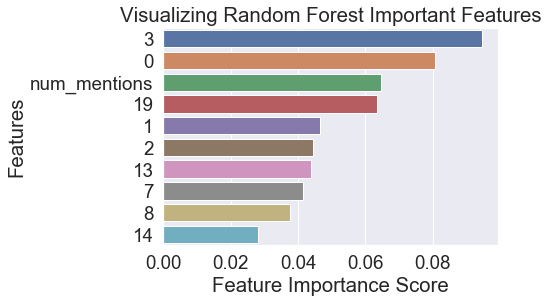

In [100]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

__Observation__: The components devrived from tweets and num_mentions were the most important features in classififying tweets. 

### Multi-Layer Preceptron Neural Network

In [101]:
# Establish and fit the model
mlp = MLPClassifier(max_iter=100) 

# Fit and predict
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)

# Check for overfitting
print(cross_val_score(mlp, X_train, y_train, cv=5))
# Default param(hidden_layer_sizes: 100, activation: ‘relu’, solver: adam’, alpha: 0.0001, learning_rate: ‘constant’)

[0.88927903 0.87687266 0.89349251 0.87195693 0.87775176]


In [102]:
# Calculate metrics
mlp_roc_auc = roc_auc_score(y_test, mlp_y_pred)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_recall = recall_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (mlp_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (mlp_accuracy * 100.0))
print('Recall: %.2f%%' % (mlp_recall * 100.0))
print('Precision: %.2f%%' % (mlp_precision * 100.0))
print(confusion_matrix(y_test, mlp_y_pred))

ROC_AUC: 87.39%
Accuracy: 87.64%
Recall: 89.64%
Precision: 88.34%
[[3456  603]
 [ 528 4567]]


In [104]:
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
}

gsc_mlp = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1, scoring='roc_auc')
gsc_mlp.fit(X_train, y_train)
print(gsc_mlp.best_params_, gsc_mlp.best_score_)

# {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50)} 0.9759338021335352

{'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50)} 0.9759338021335352


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Optimized MLP

In [105]:
# Establish and fit the model
gsc_mlp = MLPClassifier(max_iter=100, activation='tanh', hidden_layer_sizes=(50, 50, 50)) 
gsc_mlp.fit(X_train, y_train)
gsc_mlp_y_pred = gsc_mlp.predict(X_test)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [107]:
# Calculate metrics
gsc_mlp_roc_auc = roc_auc_score(y_test, gsc_mlp_y_pred)
gsc_mlp_accuracy = accuracy_score(y_test, gsc_mlp_y_pred)
gsc_mlp_recall = recall_score(y_test, gsc_mlp_y_pred)
gsc_mlp_precision = precision_score(y_test, gsc_mlp_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (gsc_mlp_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (gsc_mlp_accuracy * 100.0))
print('Recall: %.2f%%' % (gsc_mlp_recall * 100.0))
print('Precision: %.2f%%' % (gsc_mlp_precision * 100.0))
print(confusion_matrix(y_test, gsc_mlp_y_pred))

ROC_AUC: 95.07%
Accuracy: 94.77%
Recall: 92.38%
Precision: 98.10%
[[3968   91]
 [ 388 4707]]


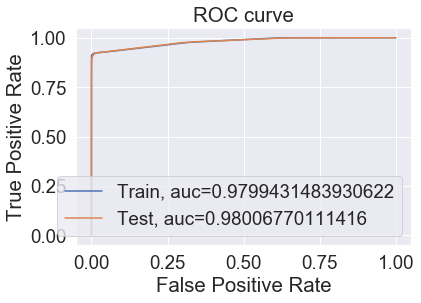

In [108]:
# Function to plot ROC curve 
roc_curve(gsc_mlp, X_train, y_train, X_test, y_test)

__Evaluation__: The optimized MLP is comparable to the random forest model. This model was better at identifying genuine tweets than bot tweets with a precision score of 98.10% and recall of 92.38%. With further hyperparamater tuning, the MLP might be able to reach accuracy of 99%. 

## Supervised Learning Conclusion 

In [110]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest',
                                           'Multi-Layer Preceptron Neural Network'],
                                 'ROC_AUC': [gsc_lr_roc_auc, gsc_rf_roc_auc, gsc_mlp_roc_auc],
                                'Accuracy': [gsc_lr_accuracy, gsc_rf_accuracy, gsc_mlp_accuracy],
                                'Recall': [gsc_lr_recall, gsc_rf_recall, gsc_mlp_recall],
                                'Precision': [gsc_lr_precision, gsc_rf_precision, gsc_mlp_precision]})

# Horizontal bar chart of 
model_comparison.sort_values('ROC_AUC', ascending = False)

,Model,ROC_AUC,Accuracy,Recall,Precision
1,Random Forest,0.996148,0.995740,0.992542,0.999802
2,Multi-Layer Preceptron Neural Network,0.950714,0.947673,0.923847,0.981034
0,Logistic Regression,0.699621,0.711492,0.804514,0.713614


#### Which model performed best?
As we can see, random forest and mlp were the top models across all metrics. However, the average scores of the random forest model remained within 99% for all metrics while mlp scores ranged from 92% to 98%.

# Unsupervised Learning 

## Reduce dimensions for clustering

### TSNE

### K-means clustering

In [ ]:
from sklearn.preprocessing import normalize
# We are limiting our feature space to 2 components here. 
#  This makes it easier to graph and see the clusters.
svd= TruncatedSVD(2)

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_svd = svd.fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_svd)

# Plot the solution.
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

## Mean-shift Clustering

In [ ]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_svd, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_svd)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

In [ ]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,labels))